## Regression-Predicting Continuos values

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create a regression dataset

In [4]:
from sklearn.datasets import make_regression
X,Y=make_regression(n_samples=5000,n_features=30,n_informative=25,noise=10,random_state=42)

In [5]:
X

array([[-1.05245683, -0.94496269, -1.79989659, ..., -1.83442393,
        -0.07956011,  1.20745263],
       [-0.84747383,  0.31840811,  0.24796167, ..., -0.2390554 ,
        -0.69763862,  1.31984005],
       [-0.94602775,  0.2383774 , -1.6176638 , ..., -0.09142036,
        -0.74652074, -2.21823553],
       ...,
       [-0.22097737,  1.14453288, -0.39354952, ..., -0.90184457,
        -0.07424546, -0.2463316 ],
       [-0.95614616,  0.03256098, -1.12885675, ..., -0.00963513,
        -1.43734832,  0.63541106],
       [ 1.51114116, -0.00270833, -1.26097476, ..., -0.15650465,
         0.50981791,  1.19398227]])

In [3]:
X.shape

(500, 30)

In [6]:
Y

array([-232.93639282, -144.45063306,  -30.67109763, ...,  143.2968639 ,
       -248.32988778,  -19.83229819])

### Save X and Y in dataframe

In [7]:
cols=[f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [8]:
import pandas as pd
X=pd.DataFrame(X,columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.052457,-0.944963,-1.799897,-0.034799,-1.482409,1.613543,-0.748163,-0.645310,1.063117,-1.335465,...,-0.398323,0.326932,2.042239,-0.301699,-1.361063,1.454857,-0.066823,-1.834424,-0.079560,1.207453
1,-0.847474,0.318408,0.247962,0.176165,0.550274,-0.695864,0.599538,-0.050914,1.363157,-1.201647,...,-1.368967,-0.403174,0.125837,-1.231097,-0.042579,-0.293594,-0.505876,-0.239055,-0.697639,1.319840
2,-0.946028,0.238377,-1.617664,-2.253756,-1.057629,-0.011553,1.400647,0.990803,-0.262228,-0.396235,...,-0.400736,0.007432,0.219753,2.205187,0.746020,-0.175596,-1.132978,-0.091420,-0.746521,-2.218236
3,-0.365222,0.004347,1.459301,1.650519,-3.114990,0.718841,1.669763,0.594568,0.350614,-0.528732,...,0.587610,0.050495,0.692244,0.492412,-0.118160,0.151945,-0.299890,1.009559,-0.779756,1.105541
4,-0.937119,0.038862,0.267291,-2.321520,-0.519995,1.281711,-0.447109,1.847404,-0.179080,0.073799,...,-0.985717,0.734585,-0.870311,0.316585,0.373045,-0.594102,-1.388615,1.262913,-0.668793,-0.049186


In [9]:
Y=pd.DataFrame(Y,columns=['Y'])

In [10]:
Y

,Y
0,-232.936393
1,-144.450633
2,-30.671098
3,165.764197
4,-252.068764
...,...
4995,337.924300
4996,587.266360
4997,143.296864
4998,-248.329888


### Creating a preprocessing Pipeline for X 

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [14]:
X_pre=num_pipe.fit_transform(X)

In [15]:
cols=num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [16]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.008775,-0.968496,-1.835622,-0.032196,-1.485420,1.614947,-0.747164,-0.627734,1.038359,-1.340893,...,-0.418507,0.322752,2.071710,-0.324901,-1.342910,1.406812,-0.052268,-1.847436,-0.064417,1.196338
1,-0.806565,0.303218,0.227826,0.179320,0.577043,-0.684461,0.585446,-0.053781,1.334905,-1.205877,...,-1.393646,-0.402106,0.132047,-1.271369,-0.027103,-0.319448,-0.496045,-0.250771,-0.679488,1.308636
2,-0.903786,0.222659,-1.652002,-2.256956,-1.054417,-0.003112,1.377584,0.952108,-0.271556,-0.393252,...,-0.420931,0.005548,0.227103,2.228029,0.759895,-0.202948,-1.129894,-0.103016,-0.728132,-2.226625
3,-0.330838,-0.012918,1.448387,1.657530,-3.141920,0.724120,1.643688,0.569500,0.334151,-0.526935,...,0.571991,0.048302,0.705328,0.483796,-0.102530,0.120436,-0.287843,0.998859,-0.761205,1.094508
4,-0.894998,0.021825,0.247303,-2.324897,-0.508906,1.284552,-0.449481,1.779248,-0.189376,0.080993,...,-1.008621,0.727476,-0.876193,0.304739,0.387677,-0.616143,-1.388281,1.252419,-0.650783,-0.059300


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
4227,0.274306,-2.243030,0.307393,2.279325,-0.849919,-0.499417,0.063387,0.322236,-0.279113,-1.485297,...,-0.435550,0.016456,-0.478773,0.826978,0.348374,0.203044,-0.974020,1.133163,0.644459,1.026561
4676,-0.110889,-2.308274,-0.306657,-2.797217,0.744218,-1.215240,0.092720,-0.881949,0.099739,-0.153516,...,0.684150,-0.050237,0.659385,0.950390,-2.264741,-0.934321,-0.207092,-1.429908,0.477449,-0.143864
800,-0.534724,0.341340,-0.318392,1.233363,1.778518,0.298750,0.083038,0.104657,0.121582,1.150535,...,2.105502,0.100787,0.150310,0.796843,0.088543,1.044029,-0.691462,0.027791,-0.467562,1.088671
3671,-0.366200,1.081039,-0.920495,-1.060692,-0.616689,0.923926,1.178280,-2.049797,-0.133985,-1.437462,...,0.375930,0.799287,-1.524107,-0.213573,1.841831,-0.235666,-1.623648,0.003545,2.453793,-0.826658
4193,-0.834782,1.471498,-1.414701,-0.704299,2.131088,-0.208189,0.823199,0.547557,0.462746,-1.556602,...,-1.605144,0.394171,0.414800,0.015313,-1.559552,0.776827,-1.919909,1.235952,-1.425568,0.749621


In [19]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [20]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1501,0.523841,0.380018,1.397668,1.832757,-0.050539,-0.370155,-0.415394,-1.015830,-0.468665,1.118904,...,-1.087076,0.280815,1.197157,-0.330182,-0.384110,0.456972,0.408793,0.229924,0.065080,-0.460325
2586,0.427962,0.736934,-1.337873,-0.286005,1.022151,-1.001614,1.835519,-1.545811,0.770498,0.293343,...,-0.316910,0.912012,-0.200186,0.895191,-1.340780,-0.398981,-1.299802,-1.160043,0.238474,-0.353788
2653,-1.237790,0.022987,0.591727,0.153331,-1.080162,0.695919,-0.224618,-1.372016,-0.465166,2.577988,...,0.420588,-0.927035,-1.260994,-0.041976,0.559996,-0.025339,0.715960,-2.211627,-0.158048,0.088334
1055,1.163302,0.829281,-0.052936,0.871349,0.526932,-0.469475,0.681055,2.525169,0.805937,-0.311984,...,-0.363881,-1.270352,-0.114835,-0.838927,0.522602,0.531030,-0.113249,-0.130759,-1.530358,0.355058
705,-0.916867,-0.873641,0.964425,-3.404521,-0.352093,0.141089,0.059867,-0.401822,0.274345,1.985234,...,-0.846910,1.259358,-0.624477,0.947502,0.249482,-0.340038,-0.624088,0.983280,1.321964,0.613101


In [21]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


In [22]:
xtrain.shape

(4000, 30)

In [23]:
xtest.shape

(1000, 30)

In [24]:
xtrain.shape[1]

30

### Create a neural network with Keras

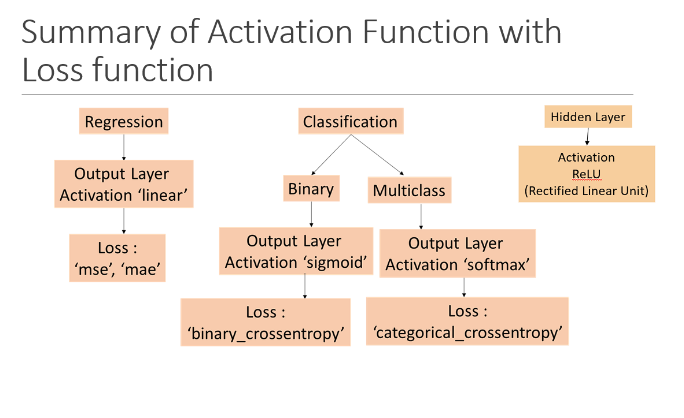

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
# Initialize Sequential model
model=Sequential()

# Hidden Layer 1
model.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))
# Hidden layer 2
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(1,activation='linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [29]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

### Training the neural network
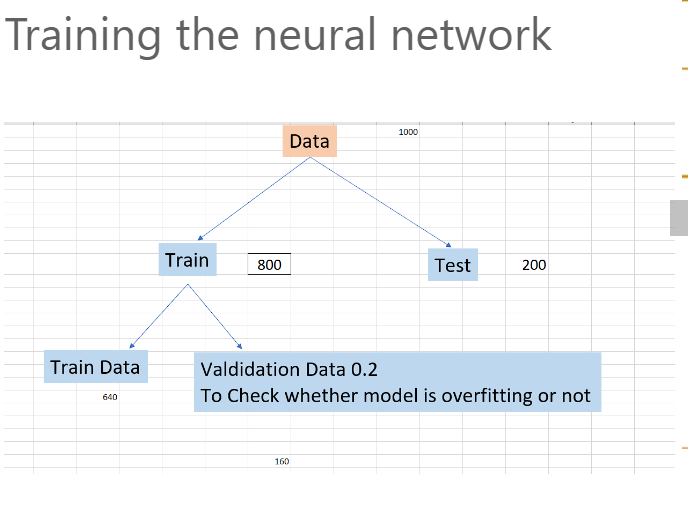


In [30]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100


100/100 [==============================] - 1s 3ms/step - loss: 66800.3672 - mae: 207.1437 - val_loss: 67713.8984 - val_mae: 207.2198
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 54512.5742 - mae: 185.7834 - val_loss: 41818.2734 - val_mae: 159.6886
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 20629.4805 - mae: 105.5913 - val_loss: 6515.7930 - val_mae: 56.4023
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 2240.8572 - mae: 32.3774 - val_loss: 1107.7042 - val_mae: 25.4582
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 712.4590 - mae: 19.9928 - val_loss: 559.0884 - val_mae: 17.7108
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 447.0253 - mae: 16.0985 - val_loss: 444.4582 - val_mae: 16.2869
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 399.8791 - mae: 15.5874 - val_loss: 419.1144 - val_mae: 15.8493
Epoch 8

In [31]:
hist.history['loss']

[66800.3671875,
 54512.57421875,
 20629.48046875,
 2240.857177734375,
 712.4590454101562,
 447.0252685546875,
 399.8790588378906,
 376.334716796875,
 356.82928466796875,
 338.2279357910156,
 320.65899658203125,
 301.81341552734375,
 284.8598937988281,
 269.6370544433594,
 253.47109985351562,
 239.31076049804688,
 224.63087463378906,
 209.3523406982422,
 197.43548583984375,
 189.0552520751953,
 175.89039611816406,
 163.8070068359375,
 155.80201721191406,
 146.1468963623047,
 137.6919708251953,
 130.1859893798828,
 125.26725769042969,
 118.17822265625,
 114.728271484375,
 109.0971450805664,
 104.62073516845703,
 101.68244171142578,
 97.63056945800781,
 97.59211730957031,
 92.78685760498047,
 91.23678588867188,
 89.7590560913086,
 88.35784149169922,
 86.38198852539062,
 85.39563751220703,
 84.42484283447266,
 82.91663360595703,
 81.51980590820312,
 81.52826690673828,
 81.3290786743164,
 79.98672485351562,
 79.34521484375,
 77.7353286743164,
 77.34867858886719,
 77.12055969238281,
 77.5632

In [32]:
hist.history['val_loss']

[67713.8984375,
 41818.2734375,
 6515.79296875,
 1107.7042236328125,
 559.0884399414062,
 444.45819091796875,
 419.1143798828125,
 390.59613037109375,
 377.5457763671875,
 358.80133056640625,
 341.72039794921875,
 322.1905212402344,
 318.0115966796875,
 298.8125915527344,
 286.69586181640625,
 270.8807373046875,
 256.9464111328125,
 248.29107666015625,
 236.81419372558594,
 223.34149169921875,
 219.6815643310547,
 204.02090454101562,
 193.4709014892578,
 189.18988037109375,
 186.078125,
 177.34812927246094,
 164.6531982421875,
 162.64837646484375,
 160.69253540039062,
 153.1260223388672,
 149.4597930908203,
 151.01934814453125,
 144.18585205078125,
 144.0478973388672,
 143.0281219482422,
 136.3928680419922,
 146.28570556640625,
 139.86898803710938,
 136.5334014892578,
 138.58358764648438,
 139.0815887451172,
 138.0718536376953,
 137.93121337890625,
 136.90841674804688,
 132.55972290039062,
 134.2044677734375,
 136.57244873046875,
 134.75901794433594,
 133.2904815673828,
 140.0499267578

In [33]:
hist.history['mae']

[207.14373779296875,
 185.78343200683594,
 105.59127807617188,
 32.377376556396484,
 19.992843627929688,
 16.098485946655273,
 15.587438583374023,
 15.065402030944824,
 14.747920989990234,
 14.387286186218262,
 13.925898551940918,
 13.523896217346191,
 13.162006378173828,
 12.767066955566406,
 12.448570251464844,
 12.070173263549805,
 11.690168380737305,
 11.287291526794434,
 11.015778541564941,
 10.687091827392578,
 10.399544715881348,
 10.057306289672852,
 9.81025505065918,
 9.509956359863281,
 9.259305000305176,
 8.993612289428711,
 8.870563507080078,
 8.57709789276123,
 8.495689392089844,
 8.278624534606934,
 8.084506034851074,
 7.993265151977539,
 7.8713860511779785,
 7.787752151489258,
 7.599482536315918,
 7.5676093101501465,
 7.5034966468811035,
 7.441624164581299,
 7.354104995727539,
 7.265339374542236,
 7.288091659545898,
 7.178225517272949,
 7.154696464538574,
 7.144923210144043,
 7.1426920890808105,
 7.0506415367126465,
 7.02254581451416,
 6.965686798095703,
 6.9108052253723

In [34]:
hist.history['val_mae']

[207.21981811523438,
 159.68861389160156,
 56.40227508544922,
 25.458236694335938,
 17.710803985595703,
 16.28687286376953,
 15.849294662475586,
 15.501617431640625,
 15.150030136108398,
 14.684792518615723,
 14.30578899383545,
 14.092717170715332,
 14.059442520141602,
 13.757720947265625,
 13.300276756286621,
 12.986800193786621,
 12.67190933227539,
 12.515499114990234,
 12.143939971923828,
 11.879851341247559,
 11.89101791381836,
 11.336699485778809,
 11.095403671264648,
 10.960823059082031,
 10.828373908996582,
 10.66845989227295,
 10.309612274169922,
 10.215893745422363,
 10.119682312011719,
 9.919593811035156,
 9.840847969055176,
 9.844576835632324,
 9.678350448608398,
 9.718337059020996,
 9.668466567993164,
 9.456892967224121,
 9.722354888916016,
 9.522147178649902,
 9.405292510986328,
 9.449017524719238,
 9.5000581741333,
 9.458852767944336,
 9.438799858093262,
 9.39046859741211,
 9.276330947875977,
 9.316807746887207,
 9.397006034851074,
 9.310550689697266,
 9.24759578704834,
 

### Plot the learning curve

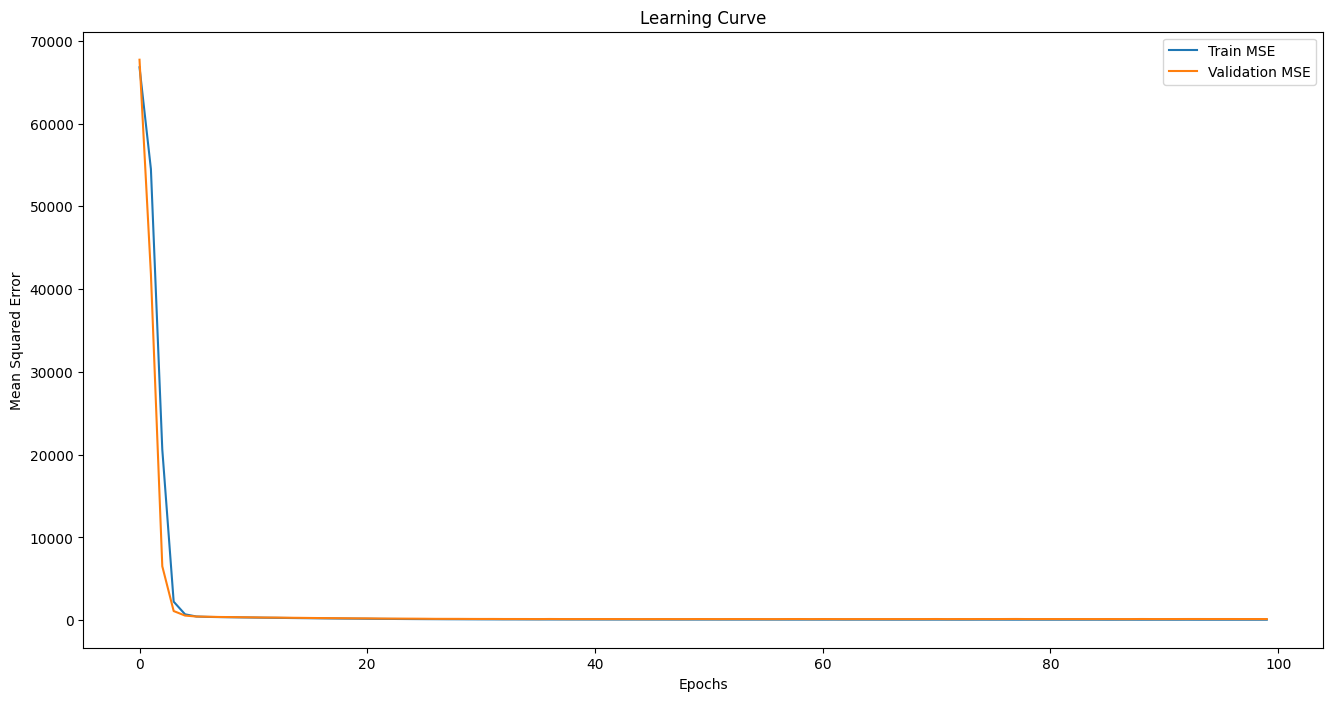

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train MSE')
plt.plot(hist.history['val_loss'],label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model

In [38]:
model.evaluate(xtrain,ytrain)

125/125 [==============================] - 0s 852us/step - loss: 71.9798 - mae: 6.5030


[71.97976684570312, 6.5030035972595215]

In [39]:
model.evaluate(xtest,ytest)

32/32 [==============================] - 0s 925us/step - loss: 131.0260 - mae: 9.1069


[131.02601623535156, 9.106904983520508]

### Predict train and test

In [40]:
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)

32/32 [==============================] - 0s 716us/step


In [41]:
ypred_tr[0:5]

array([[ 419.02963 ],
       [-459.2259  ],
       [  39.193417],
       [ 114.6859  ],
       [-220.15726 ]], dtype=float32)

In [42]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [43]:
ypred_ts[0:5]

array([[ 301.72598 ],
       [ -63.123623],
       [-196.15681 ],
       [ 235.2591  ],
       [ 178.60182 ]], dtype=float32)

In [44]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


### Show r2 score in train and test

In [45]:
from sklearn.metrics import r2_score
tr_r2=r2_score(ytrain,ypred_tr)
print(f'Training R2:{tr_r2:.4f}')

Training R2:0.9989


In [47]:
ts_r2=r2_score(ytest,ypred_ts)
print(f'Testing R2:{ts_r2:.4f}')

Testing R2:0.9982


### Save the model for future

In [48]:
model.save('Regression.keras')

### Loading the model

In [49]:
from keras.models import load_model

In [50]:
nn=load_model('Regression.keras')

In [51]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
